In [156]:
import pandas as pd
import numpy as np
import pickle
from FPMC import FPMC as FM
import dill
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
fName = 'tesModel3.pcl'
obj = FM()


In [3]:
# import products description
products    =  pd.read_csv('../data/products.csv',index_col='product_id')

In [5]:
orders = pd.read_csv('../data/orders.csv',index_col = 'order_id',
                     usecols = ['order_id','user_id','eval_set','order_number','days_since_prior_order'])

usecols = ['order_id','product_id']
items = pd.concat([pd.read_csv('../data/order_products__train.csv',usecols = usecols),
                   pd.read_csv('../data/order_products__prior.csv',usecols = usecols)])

/home/frodos/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [125]:
obj.load(fName)    
tUser = 50
tOrders = orders.query('user_id == @tUser')

prevOrderId = tOrders.query('order_number == 1').index.values
#print prevOrderId

prevBasket = items.query('order_id == @prevOrderId').product_id.values

for newOrderId in tOrders.index.values[1:-1]:
    print 'Order id is', newOrderId
    newBasket = items.query('order_id == @newOrderId').product_id.values
    obj.addOrder(tUser,newBasket,prevBasket,iterations = 1e4)
    prevBasket = newBasket

Order id is 3131103
Order id is 2197066
Order id is 3201640
Order id is 2756806
Order id is 1905727
Order id is 357849
Order id is 1673791
Order id is 1941871
Order id is 1431607
Order id is 935755
Order id is 771250
Order id is 218647
Order id is 482971
Order id is 1261865
Order id is 2102570
Order id is 1856643
Order id is 2199859
Order id is 505360
Order id is 2829245
Order id is 1077695
Order id is 3067010
Order id is 458687
Order id is 536094
Order id is 886814
Order id is 1291785
Order id is 1182191
Order id is 2333885
Order id is 3112215
Order id is 3276486
Order id is 2870447
Order id is 623555
Order id is 2443843
Order id is 867561
Order id is 2049647
Order id is 2981401
Order id is 2425696
Order id is 1177903
Order id is 2885215
Order id is 3285176
Order id is 1158241
Order id is 131991
Order id is 1237400
Order id is 3014513
Order id is 1368931
Order id is 1076291
Order id is 412136
Order id is 1939933
Order id is 3147929
Order id is 2018336
Order id is 1229178
Order id is 3

In [126]:
testBasket = items.query('order_id == @testOrderId').product_id.values
ordIds = tOrders.index.values[:-1]
fullBasket = items.query('order_id in @ordIds').drop_duplicates('product_id')
fullBasket = fullBasket.merge(products,left_on='product_id',right_index=True).drop(['aisle_id','department_id'],axis = 1)

In [132]:
for k ,v in fullBasket.iterrows():
    fullBasket.loc[k,'prob'] =  obj.getProbability(basket=prevBasket, item=v.product_id, user=tUser)
    fullBasket.loc[k,'wasOrdered'] = v.product_id in testBasket
    
fullBasket.sort_values('wasOrdered',ascending=True)

,order_id,product_id,product_name,prob,wasOrdered
6082729,642111,36696,The Original Natural Herb Drops Cough Suppressant,0.646450,False
18391310,1939933,41844,Honey Nut Cheerios,0.574771,False
15862856,1673791,18370,Organic Shredded Mozzarella,0.249832,False
13563659,1431607,14086,Sparkling Apple Juice,-0.154273,False
13563657,1431607,14651,Tommy/Kent/Keitt/Haden Mango,0.354382,False
12916159,1363380,37852,Organic Cranberry Juice,0.296306,False
12238742,1291785,48775,Organic Red Cabbage,0.116547,False
11953990,1261865,48857,Authentic French Brioche,-0.326868,False
10971098,1158241,5876,Organic Lemon,0.652559,False
18409476,1941871,7054,Low Fat Plain Yogurt,0.227721,False


In [176]:
def testModel(tUser):
    tOrders = orders.query('user_id == @tUser')
    testOrder = tOrders.query("eval_set != 'prior'")

    if testOrder.eval_set.values == 'test':
        print 'Test user'
        return
    else:
        testOrderId = testOrder.index.values

    # train the model
    prevOrderId = tOrders.query('order_number == 1').index.values
    prevBasket = items.query('order_id == @prevOrderId').product_id.values

    for newOrderId in tOrders.index.values[1:-1]:
        #print 'Order id is', newOrderId
        newBasket = items.query('order_id == @newOrderId').product_id.values
        obj.addOrder(tUser,newBasket,prevBasket,iterations = 1e4)
        prevBasket = newBasket

    testBasket = items.query('order_id == @testOrderId').product_id.values

    ordIds = tOrders.index.values[:-1]
    fullBasket = items.query('order_id in @ordIds').drop_duplicates('product_id')
    fullBasket = fullBasket.merge(products,left_on='product_id',right_index=True).drop(['aisle_id','department_id'],axis = 1) 

    for k ,v in fullBasket.iterrows():
        fullBasket.loc[k,'prob'] =  obj.getProbability(basket=prevBasket, item=v.product_id, user=tUser)
        fullBasket.loc[k,'wasOrdered'] = v.product_id in testBasket
        
    fullBasket.sort_values('wasOrdered',ascending=True,inplace=True) 
    return fullBasket
    

In [150]:
c = testModel(52)

Order id is 1318871
Order id is 1261384
Order id is 2100631
Order id is 580568
Order id is 1680554
Order id is 2428073
Order id is 1551977
Order id is 342306
Order id is 1520353
Order id is 2542086
Order id is 944694
Order id is 2906390
Order id is 1838593
Order id is 1268191
Order id is 2331002
Order id is 1122089
Order id is 1498922
Order id is 180919
Order id is 3146572
Order id is 2695875
Order id is 1307894
Order id is 1856103
Order id is 1030102
Order id is 3306717
Order id is 2127348
Order id is 1588305


In [154]:
c.sort_values('wasOrdered',ascending=False)

,order_id,product_id,product_name,prob,wasOrdered
8948389,944694,27839,49 Flavors Jelly Belly Jelly Beans,0.622812,True
1715865,180919,46149,Zero Calorie Cola,0.649387,True
12390928,1307894,8048,Packaged Grape Tomatoes,-0.738264,True
15052890,1588305,43352,Raspberries,0.640902,True
9756324,1030102,30450,Creamy Almond Butter,0.629606,True
1715863,180919,6184,Clementines,0.617601,False
14408185,1520353,116,English Muffins,0.607825,False
15052896,1588305,42265,Organic Baby Carrots,0.633431,False
15052897,1588305,35886,Organic Blueberries Clamshell,0.643689,False
15052898,1588305,26604,Organic Blackberries,0.637209,False


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f66aafb66d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f66a2659c90>], dtype=object)

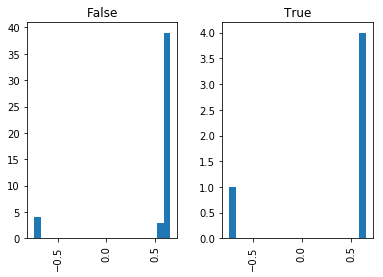

In [162]:
c.hist(bins = 20,column='prob',by='wasOrdered')

Order id is 2239092
Order id is 227361


,order_id,product_id,product_name,prob,wasOrdered
21227516,2239092,11210,Extra Large Grade A Eggs,-0.822737,True
31899339,3364570,377,Chunky Beef with Vegetables & Brown Rice Dog Food,-0.662424,True
2156355,227361,12583,Organic Gold Beets,0.710040,False
21227526,2239092,37609,Extra Crispy Tator Tots,0.690645,False
21227521,2239092,16797,Strawberries,0.693404,False


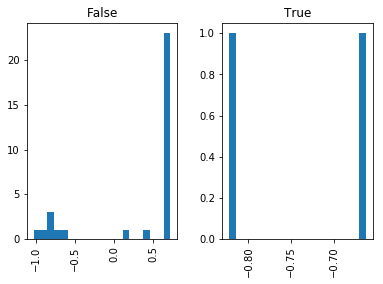

In [168]:
c3 = testModel(53)
c3.hist(bins = 20,column='prob',by='wasOrdered')
c3.sort_values('wasOrdered',ascending=False).head()

Order id is 2239092
Order id is 227361


,order_id,product_id,product_name,prob,wasOrdered
21227516,2239092,11210,Extra Large Grade A Eggs,0.047096,True
31899339,3364570,377,Chunky Beef with Vegetables & Brown Rice Dog Food,-0.569201,True
2156355,227361,12583,Organic Gold Beets,0.051736,False
21227526,2239092,37609,Extra Crispy Tator Tots,0.054745,False
21227521,2239092,16797,Strawberries,0.049851,False


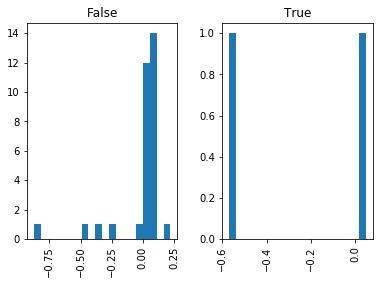

In [170]:
obj._lil = 1.0
obj._liu = 1.0
obj._lli = 1.0
obj._lui = 1.0

c3 = testModel(53)
c3.hist(bins = 20,column='prob',by='wasOrdered')
c3.sort_values('wasOrdered',ascending=False).head()

Order id is 2239092
Order id is 227361


,order_id,product_id,product_name,prob,wasOrdered
21227516,2239092,11210,Extra Large Grade A Eggs,0.000021,True
31899339,3364570,377,Chunky Beef with Vegetables & Brown Rice Dog Food,-0.221886,True
2156355,227361,12583,Organic Gold Beets,-0.000038,False
21227526,2239092,37609,Extra Crispy Tator Tots,-0.000032,False
21227521,2239092,16797,Strawberries,-0.000044,False


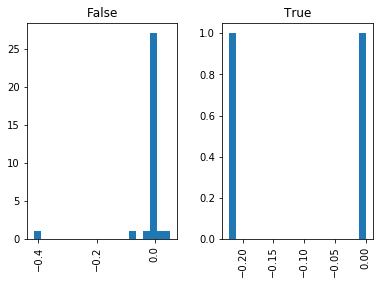

In [171]:
obj._lil = 10
obj._liu = 10
obj._lli = 10
obj._lui = 10

c3 = testModel(53)
c3.hist(bins = 20,column='prob',by='wasOrdered')
c3.sort_values('wasOrdered',ascending=False).head()

Order id is 3131103
Order id is 2197066
Order id is 3201640
Order id is 2756806
Order id is 1905727
Order id is 357849
Order id is 1673791
Order id is 1941871
Order id is 1431607
Order id is 935755
Order id is 771250
Order id is 218647
Order id is 482971
Order id is 1261865
Order id is 2102570
Order id is 1856643
Order id is 2199859
Order id is 505360
Order id is 2829245
Order id is 1077695
Order id is 3067010
Order id is 458687
Order id is 536094
Order id is 886814
Order id is 1291785
Order id is 1182191
Order id is 2333885
Order id is 3112215
Order id is 3276486
Order id is 2870447
Order id is 623555
Order id is 2443843
Order id is 867561
Order id is 2049647
Order id is 2981401
Order id is 2425696
Order id is 1177903
Order id is 2885215
Order id is 3285176
Order id is 1158241
Order id is 131991
Order id is 1237400
Order id is 3014513
Order id is 1368931
Order id is 1076291
Order id is 412136
Order id is 1939933
Order id is 3147929
Order id is 2018336
Order id is 1229178
Order id is 3

,order_id,product_id,product_name,prob,wasOrdered
981338,103726,13176,Bag of Organic Bananas,-2.143320e-12,True
981339,103726,6182,Natural Artesian Bottled Water,-1.094959e-13,True
981343,103726,31720,Organic Whole Milk,-5.580905e-12,True
2933126,309687,16249,Lacinato Kale Og,3.206403e-12,True
981346,103726,21903,Organic Baby Spinach,1.342824e-11,True


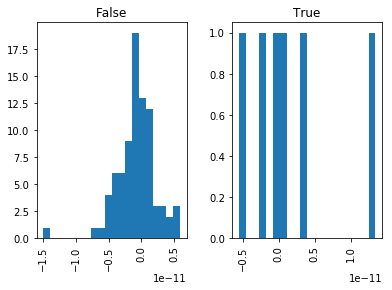

In [172]:
c3 = testModel(50)
c3.hist(bins = 20,column='prob',by='wasOrdered')
c3.sort_values('wasOrdered',ascending=False).head()

,order_id,product_id,product_name,prob,wasOrdered
981338,103726,13176,Bag of Organic Bananas,0.137244,True
981343,103726,31720,Organic Whole Milk,0.137333,True
2933126,309687,16249,Lacinato Kale Og,0.112647,True
981346,103726,21903,Organic Baby Spinach,0.140585,True
1250832,131991,47209,Organic Hass Avocado,0.115626,True


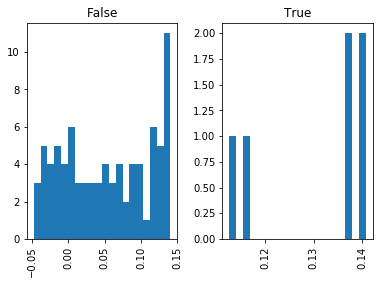

In [177]:
obj._lil = 1
obj._liu = 1
obj._lli = 1
obj._lui = 1

c3 = testModel(50)
c3.hist(bins = 20,column='prob',by='wasOrdered')
c3.sort_values('wasOrdered',ascending=False).head()

,order_id,product_id,product_name,prob,wasOrdered
981338,103726,13176,Bag of Organic Bananas,0.635915,True
981343,103726,31720,Organic Whole Milk,0.655424,True
2933126,309687,16249,Lacinato Kale Og,0.616755,True
981346,103726,21903,Organic Baby Spinach,0.654550,True
1250832,131991,47209,Organic Hass Avocado,0.588545,True


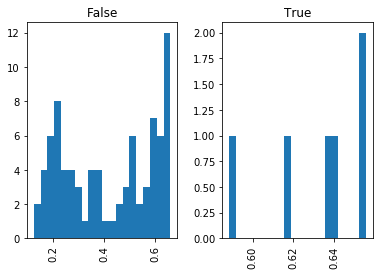

In [178]:
obj._lil = 0.1
obj._liu = 0.1
obj._lli = 0.1
obj._lui = 0.1

c3 = testModel(50)
c3.hist(bins = 20,column='prob',by='wasOrdered')
c3.sort_values('wasOrdered',ascending=False).head()

In [ ]:
obj._lil = 10
obj._liu = 10
obj._lli = 10
obj._lui = 10

c3 = testModel(50)
c3.hist(bins = 20,column='prob',by='wasOrdered')
c3.sort_values('wasOrdered',ascending=False).head()